## How often does President Trump tweet each day?

In [1]:
import altair as alt
import pandas as pd
import matplotlib as mpl
import numpy as np
import json
import pytz
from datetime import datetime
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

### Dump from trumptweetarchive.com

In [2]:
src = pd.read_json('/Users/mhustiles/data/github/notebooks/trump-tweet-frequency/output/realdonaldtrump.json') 

### How many tweets since May 2009?

In [3]:
len(src)

43848

### Clean up dates

In [4]:
src['eastern_created_at'] = src['created_at'].dt.time
src['eastern_created_at'] = src['created_at'].dt.tz_localize("GMT").dt.tz_convert('America/Los_Angeles')
src['date'] = pd.to_datetime(src['eastern_created_at']).dt.strftime('%m/%d/%Y')
src['date'] = pd.to_datetime(src['date'])
src['year'] = src['eastern_created_at'].dt.year
src['month'] = src['eastern_created_at'].dt.month
src['day'] = src['eastern_created_at'].dt.day
src['hour'] = src['eastern_created_at'].dt.hour
src['minute'] = src['eastern_created_at'].dt.minute
src['time'] = src['eastern_created_at'].dt.time
src['id_str'] = src['id_str'].astype(str)
src['year'] = src['year'].astype(str)
src['month'] = src['month'].astype(str)
src['day'] = src['day'].astype(str)
src['hour'] = src['hour'].astype(str)

In [5]:
src.dtypes

index                                                    int64
created_at                                      datetime64[ns]
favorite_count                                           int64
id_str                                                  object
in_reply_to_user_id_str                                float64
is_retweet                                                bool
retweet_count                                            int64
source                                                  object
text                                                    object
eastern_created_at         datetime64[ns, America/Los_Angeles]
date                                            datetime64[ns]
year                                                    object
month                                                   object
day                                                     object
hour                                                    object
minute                                                 

In [6]:
src.sort_values(by='eastern_created_at', ascending=False).head()

,index,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,0,2019-12-19 18:06:07,0,1207723800823042048,NaN,True,22425,Twitter for iPhone,RT @realDonaldTrump: https://t.co/WzLB5s41m3,2019-12-19 10:06:07-08:00,2019-12-19,2019,12,19,10,6,10:06:07
1,1,2019-12-19 16:07:59,105206,1207694073634705408,NaN,False,25879,Twitter for iPhone,Pelosi feels her phony impeachment HOAX is so ...,2019-12-19 08:07:59-08:00,2019-12-19,2019,12,19,8,7,08:07:59
2,2,2019-12-19 15:52:54,40254,1207690276673900544,NaN,False,10595,Twitter for iPhone,Thank you Rena! https://t.co/HcFHB61cPD,2019-12-19 07:52:54-08:00,2019-12-19,2019,12,19,7,52,07:52:54
3,3,2019-12-19 15:48:03,44535,1207689056538308608,NaN,False,11105,Twitter for iPhone,Thank you Terrence! https://t.co/6qro1mI4dm,2019-12-19 07:48:03-08:00,2019-12-19,2019,12,19,7,48,07:48:03
4,4,2019-12-19 15:44:55,0,1207688268281765888,NaN,True,7008,Twitter for iPhone,RT @ARmastrangelo: The Left uses the U.S. Cons...,2019-12-19 07:44:55-08:00,2019-12-19,2019,12,19,7,44,07:44:55


### Tweets per month, year

In [7]:
trump_years = src.groupby(['year', 'month']).agg({'date': 'count'}).reset_index()

In [8]:
trump_years.tail()

,year,month,date
123,2019,5,692
124,2019,6,492
125,2019,7,691
126,2019,8,686
127,2019,9,800


### What did he average each day in retweets, likes and replies

In [9]:
trump_engagements_day = src.groupby(['date']).mean().round().reset_index()

In [10]:
trump_engagements_day.head()

,date,index,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,minute
0,2009-05-04,54.0,102.0,NaN,0.0,128.0,27.0
1,2009-05-08,52.0,14.0,NaN,0.0,6.0,39.0
2,2009-05-12,50.0,982.0,NaN,0.0,716.0,14.0
3,2009-05-13,49.0,10.0,NaN,0.0,11.0,38.0
4,2009-05-14,48.0,6.0,NaN,0.0,3.0,30.0


### Limit data to when Trump took office

In [11]:
trumpall_prez = src[src.date >= '01/20/2017']

In [12]:
#since regularly started tweeting
trumpall = src[src.date >= '01/20/2012']

### How many tweets since then?

In [13]:
len(trumpall_prez)

13513

### Limit data to month Trump announced candidacy

In [14]:
trumpall_running = src[src.date >= '06/01/2015']

### How many tweets since then?

In [15]:
len(trumpall_running)

21917

### Count daily tweets since candidacy, create dataframe with results

In [16]:
trump_tweets_day_candidacy = trumpall_running.groupby(['date']).size()
trump_tweets_day_candidacy_df = pd.DataFrame({'date': trump_tweets_day_candidacy.index, 'count': trump_tweets_day_candidacy.values})

In [17]:
trump_tweets_day_candidacy_df.to_csv('output/trump_tweets_day_candidacy.csv')

### Count daily tweets since inaguration, create dataframe with results

In [18]:
trump_tweets_day_prez = trumpall_prez.groupby(['date']).size()
trump_tweets_day_prez_df = pd.DataFrame({'date': trump_tweets_day_prez.index, 'count': trump_tweets_day_prez.values})

In [19]:
trump_tweets_day_prez_df.to_csv('output/trump_tweets_day_prez.csv')

### Count daily tweets from the beginning, create dataframe with results

In [20]:
trump_tweets_day = trumpall.groupby(['date']).agg('size').reset_index(name='count')
trump_tweets_day.head()

,date,count
0,2012-01-20,7
1,2012-01-23,8
2,2012-01-24,6
3,2012-01-25,12
4,2012-01-26,10


In [21]:
trump_tweets_day.to_csv('output/trump_tweets_day.csv')

### Sort table to see top days since candidacy

In [22]:
trump_freq_candidacy = trump_tweets_day_candidacy_df.sort_values(['count'], ascending=False)

In [23]:
trump_freq_candidacy.head()

,date,count
1635,2019-12-12,124
1631,2019-12-08,106
132,2015-10-13,93
503,2016-10-19,87
1410,2019-05-01,84


### Sort table to see top days since inauguration

In [24]:
trump_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [25]:
trump_freq_inauguration.head(5)

,date,count
1042,2019-12-12,124
1038,2019-12-08,106
817,2019-05-01,84
1009,2019-11-09,82
1041,2019-12-11,77


### Read all from today

In [26]:
# need a function here to use most recent day if none today
today = pd.datetime.today().strftime("%m/%d/%Y")

In [27]:
trump_tweets_today = trumpall_prez[trumpall_prez.date == today]

In [28]:
trump_tweets_today.head(len(trump_tweets_today))

,index,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,eastern_created_at,date,year,month,day,hour,minute,time
0,0,2019-12-19 18:06:07,0,1207723800823042048,NaN,True,22425,Twitter for iPhone,RT @realDonaldTrump: https://t.co/WzLB5s41m3,2019-12-19 10:06:07-08:00,2019-12-19,2019,12,19,10,6,10:06:07
1,1,2019-12-19 16:07:59,105206,1207694073634705408,NaN,False,25879,Twitter for iPhone,Pelosi feels her phony impeachment HOAX is so ...,2019-12-19 08:07:59-08:00,2019-12-19,2019,12,19,8,7,08:07:59
10,10,2019-12-19 15:33:18,32665,1207685345225129984,NaN,False,10127,Twitter for iPhone,Our great Congressman Gohmert is a TRUE patrio...,2019-12-19 07:33:18-08:00,2019-12-19,2019,12,19,7,33,07:33:18
11,11,2019-12-19 15:20:41,0,1207682168119549952,NaN,True,2689,Twitter for iPhone,RT @FreemanWSJ: Thanks! https://t.co/0GowZdEs3n,2019-12-19 07:20:41-08:00,2019-12-19,2019,12,19,7,20,07:20:41
12,12,2019-12-19 15:18:39,0,1207681656544518144,NaN,True,4084,Twitter for iPhone,RT @SpecialReport: Attorney General William Ba...,2019-12-19 07:18:39-08:00,2019-12-19,2019,12,19,7,18,07:18:39
13,13,2019-12-19 15:16:52,0,1207681207267397632,NaN,True,3539,Twitter for iPhone,RT @jdanbishop: 5 pgs of evidence. Endless arg...,2019-12-19 07:16:52-08:00,2019-12-19,2019,12,19,7,16,07:16:52
14,14,2019-12-19 15:15:04,0,1207680755444436992,NaN,True,3435,Twitter for iPhone,RT @DanHenninger: The Barr-Horowitz ‘disagreem...,2019-12-19 07:15:04-08:00,2019-12-19,2019,12,19,7,15,07:15:04
15,15,2019-12-19 15:14:49,0,1207680691514814464,NaN,True,3907,Twitter for iPhone,RT @DanHenninger: The lack of liberal outrage ...,2019-12-19 07:14:49-08:00,2019-12-19,2019,12,19,7,14,07:14:49
16,16,2019-12-19 14:30:34,0,1207669555881029632,NaN,True,16107,Twitter for iPhone,RT @LindseyGrahamSC: If House Dems refuse to s...,2019-12-19 06:30:34-08:00,2019-12-19,2019,12,19,6,30,06:30:34
17,17,2019-12-19 14:30:28,0,1207669533995143168,NaN,True,7812,Twitter for iPhone,RT @LindseyGrahamSC: Not allowing the Senate t...,2019-12-19 06:30:28-08:00,2019-12-19,2019,12,19,6,30,06:30:28


---

### RT vs Tweet

In [29]:
rt_tweet = trumpall.groupby(['date', 'is_retweet']).agg('size').reset_index(name='count')
rt_tweet_recent = trumpall[trumpall['date'] > '2019-08-01']\
    .groupby(['date', 'is_retweet']).agg('size').reset_index(name='count')

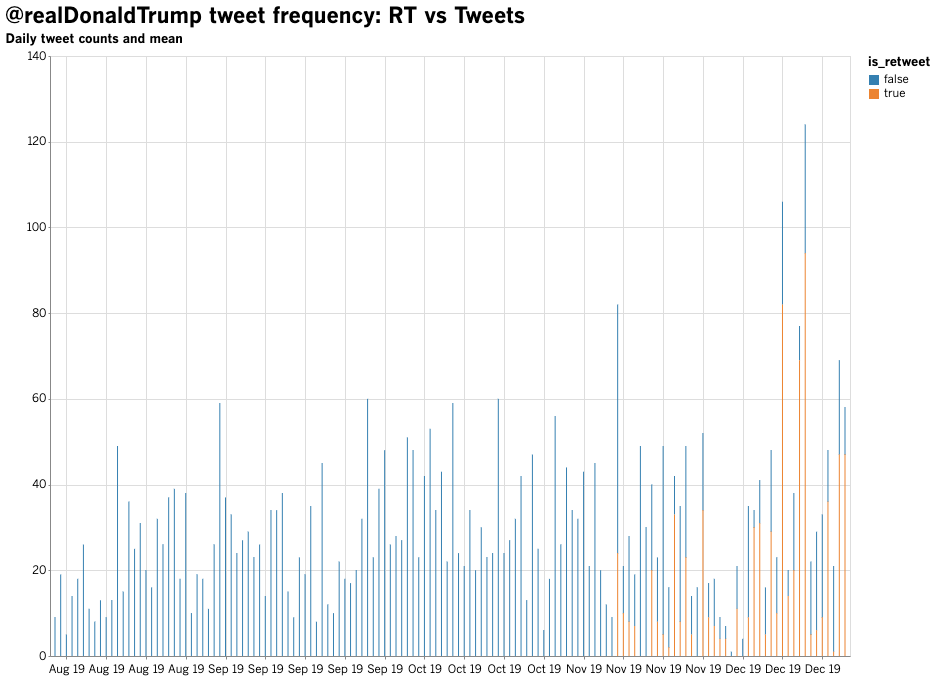

In [30]:
#bars
stacked_lines = alt.Chart(rt_tweet_recent, title = '@realDonaldTrump tweet frequency: RT vs Tweets').mark_bar(size=1).encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 140)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
    color='is_retweet',
)

#rule showing mean

rule = alt.Chart(rt_tweet_recent).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
stacked_lines_text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
(stacked_lines).properties(height=600,width=800)

In [31]:
rt_pivot = pd.DataFrame(pd.pivot_table(rt_tweet, values='count', index=['date'],\
                          columns=['is_retweet'], aggfunc=np.sum).\
                        rename(columns={'is_retweet':'id', False:'tweet', True:'retweet'}).reset_index().fillna(''))

In [32]:
rt_pivot.to_csv('output/rt_pivot.csv')

---

### Chart it!

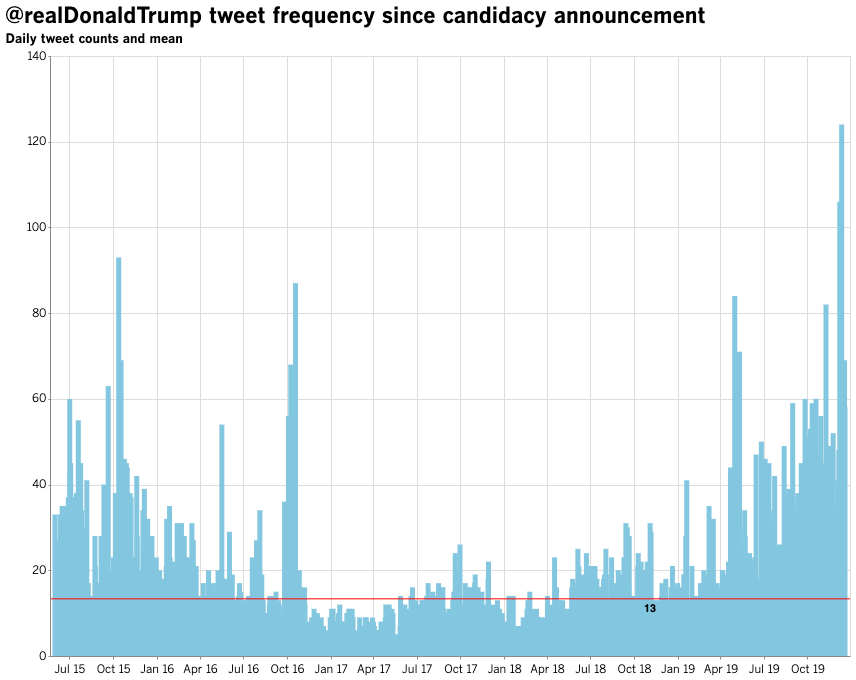

In [33]:
#bars

lines = alt.Chart(trump_tweets_day_candidacy_df, title = '@realDonaldTrump tweet frequency since candidacy announcement').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b %y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 140)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_tweets_day_candidacy_df).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( lines + rule + text ).properties(height=600,width=800)

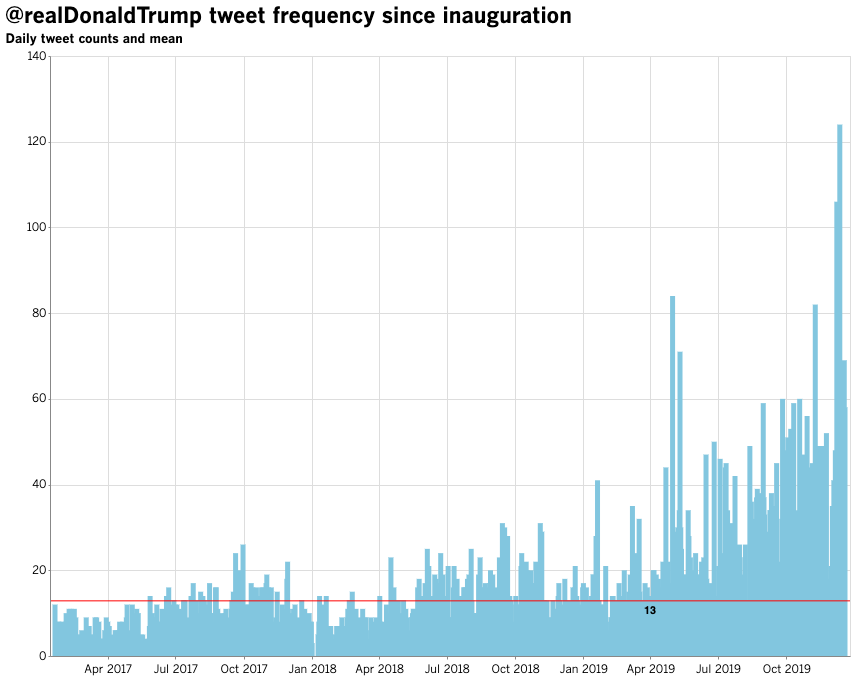

In [34]:
#bars

bars = alt.Chart(trump_freq_inauguration, title = '@realDonaldTrump tweet frequency since inauguration').\
    mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%b 20%y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 140)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean

rule = alt.Chart(trump_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=200,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( bars + rule + text ).properties(height=600,width=800)

In [35]:
trump_freq_inauguration.head()

,date,count
1042,2019-12-12,124
1038,2019-12-08,106
817,2019-05-01,84
1009,2019-11-09,82
1041,2019-12-11,77


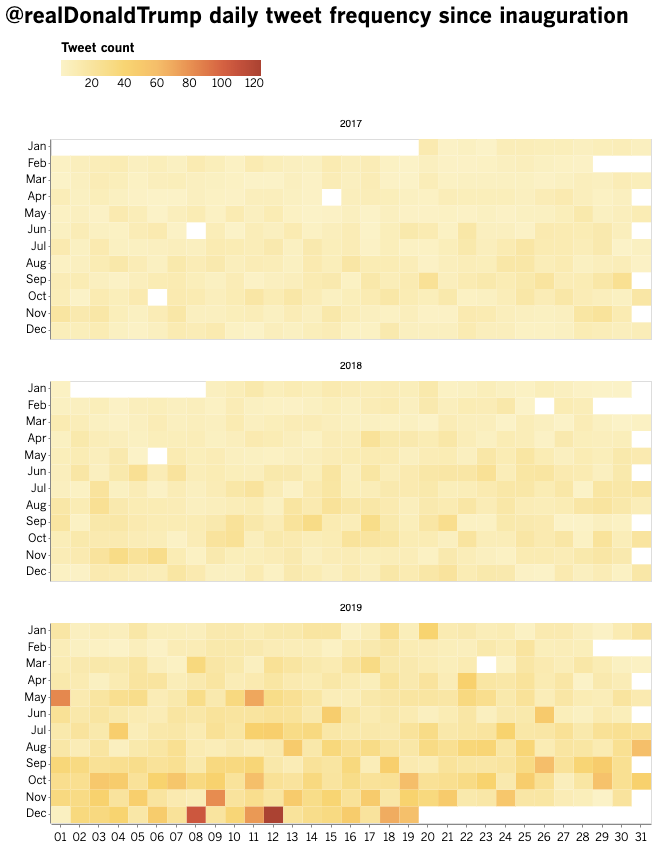

In [36]:
heatmap = alt.Chart(
    trump_freq_inauguration,
    title="@realDonaldTrump daily tweet frequency since inauguration"
).mark_rect().encode(
    x=alt.X('date(date):O', title=' '),
    y=alt.Y('month(date):O', title=''),
    color=alt.Color('count:Q', title='Tweet count'),
    tooltip=[
        alt.Tooltip('monthdate(date):T', title='Date'),
        alt.Tooltip('count:Q', title='Tweets')
    ],
    facet=alt.Facet('year(date):O', title='')
).properties(width=600, height=200,columns=1)

heatmap.configure_legend(
    orient='top',
    padding=10
)

In [37]:
trump_RT_freq_inauguration = trump_tweets_day_prez_df.sort_values(['count'], ascending=False)

In [38]:
trumpall_prez_rt = trumpall_prez[trumpall_prez['is_retweet'] == True]
trumpall_prez_no_rt = trumpall_prez[trumpall_prez['is_retweet'] == False]

### Retweets

In [39]:
trump_tweets_day_prez_rt = trumpall_prez_rt.groupby(['date']).size()
trump_tweets_day_prez_rt_df = pd.DataFrame({'date': trump_tweets_day_prez_rt.index, \
                                         'count': trump_tweets_day_prez_rt.values})

In [40]:
trump_tweets_day_prez_rt_df.sort_values(by='date', ascending=False).head()

,date,count
300,2019-12-19,47
299,2019-12-18,47
298,2019-12-17,1
297,2019-12-16,36
296,2019-12-15,9


### No retweets

In [41]:
trump_tweets_day_prez_no_rt = trumpall_prez_no_rt.groupby(['date']).size()
trump_tweets_day_prez_no_rt_df = pd.DataFrame({'date': trump_tweets_day_prez_no_rt.index, \
                                         'count': trump_tweets_day_prez_no_rt.values})

In [42]:
# retweets
trump_rt_freq_inauguration = trump_tweets_day_prez_rt_df.sort_values(['count'], ascending=False)
# no retweets
trump_no_rt_freq_inauguration = trump_tweets_day_prez_no_rt_df.sort_values(['count'], ascending=False)

In [43]:
trump_rt_freq_inauguration.head()

,date,count
293,2019-12-12,94
289,2019-12-08,82
292,2019-12-11,69
300,2019-12-19,47
299,2019-12-18,47


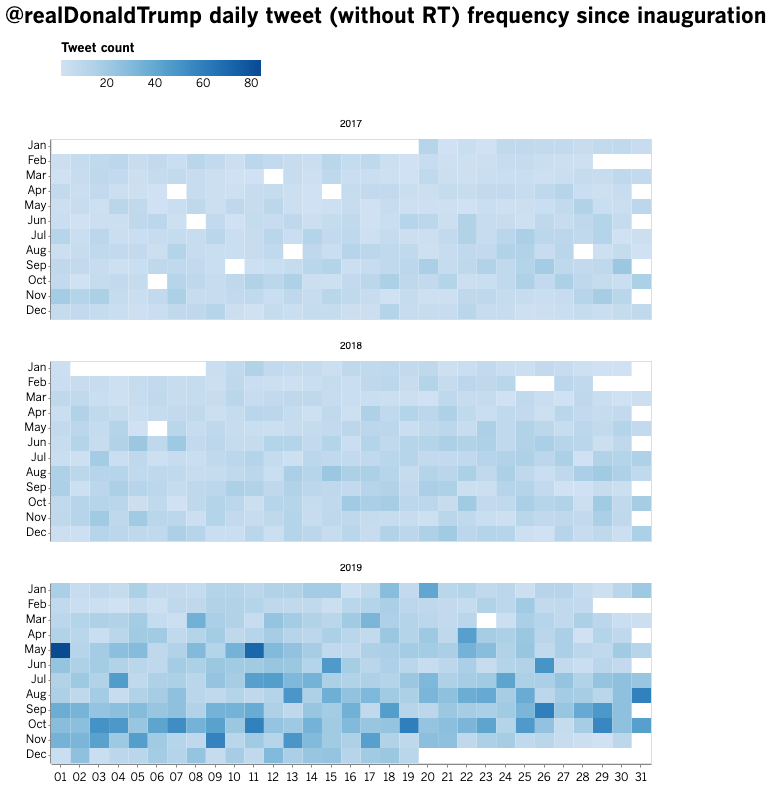

In [44]:
### Try a different color scheme 

heatmap = alt.Chart(
    trump_no_rt_freq_inauguration,
    title="@realDonaldTrump daily tweet (without RT) frequency since inauguration"
).mark_rect().encode(
    x=alt.X('date(date):O', title=' '),
    y=alt.Y('month(date):O', title=''),
    color=alt.Color('count:Q', title='Tweet count', scale=alt.Scale(scheme="blues")),
    tooltip=[
        alt.Tooltip('monthdate(date):T', title='Date'),
        alt.Tooltip('count:Q', title='Tweets')
    ],
    facet=alt.Facet('year(date):O', title='')
).properties(width=600, height=180,columns=1)

heatmap.configure_legend(
    orient='top',
    padding=10
)

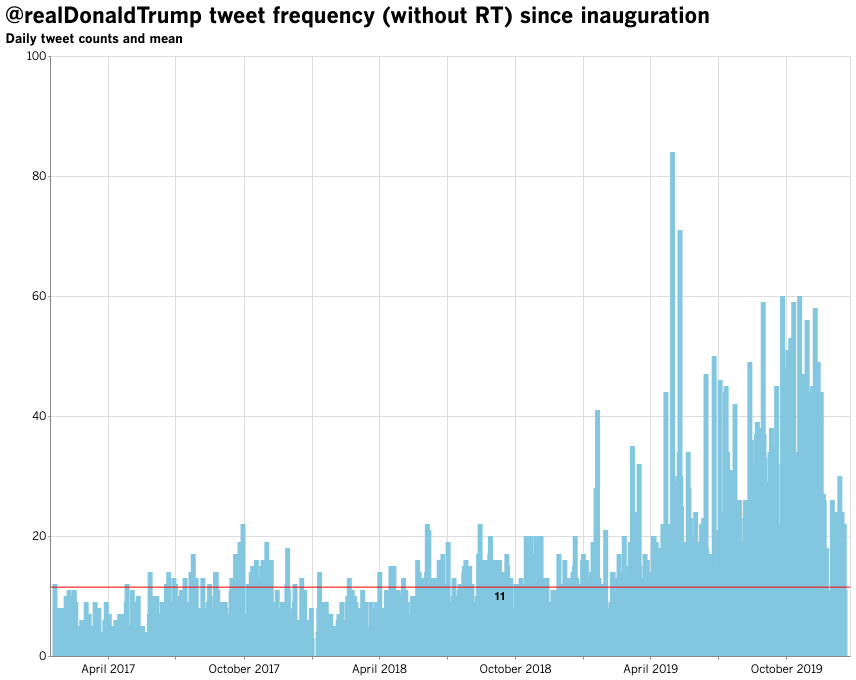

In [45]:
#bars
bars = alt.Chart(trump_no_rt_freq_inauguration, \
                 title = '@realDonaldTrump tweet frequency (without RT) since inauguration').mark_bar().encode(
    x = alt.X('date:T', axis = alt.Axis(title = '', format = ("%B 20%y"))),
    y = alt.Y('count:Q',
        scale=alt.Scale(domain=(0, 100)), axis = alt.Axis(tickCount=6, title = 'Daily tweet counts and mean')),
)

#rule showing mean
rule = alt.Chart(trump_no_rt_freq_inauguration).mark_rule(color='red').encode(
    y='mean(count):Q'
)

#rule label -- would like to add "Average: " annotation
text = rule.mark_text(
    align='center',
    baseline='middle',
    dx=50,
    dy=10,
    fontWeight='bold',
).encode(
    text=alt.Text('mean(count):Q', format=".2"))

#go
( bars + rule + text ).properties(height=600,width=800)